# Preparation

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats
from scipy.stats import norm
import pylab

In [2]:
#Set start date and end date
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 2, 1)

In [3]:
#Get IHSG Data
IHSG = wb.DataReader(['^JKSE'], 'yahoo', start, end)
IHSG

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,^JKSE,^JKSE,^JKSE,^JKSE,^JKSE,^JKSE
Date,,,,,,
2010-01-04,2575.336670,2575.413086,2576.055908,2532.895996,2533.947998,18339300.0
2010-01-05,2605.199707,2605.277100,2606.069092,2575.616943,2575.616943,57043800.0
2010-01-06,2603.219727,2603.297119,2622.115967,2587.709961,2605.480957,51569100.0
2010-01-07,2586.818115,2586.895020,2611.603027,2570.272949,2603.500977,45510800.0
2010-01-08,2614.292480,2614.370117,2614.535889,2583.846924,2586.792969,73723500.0
...,...,...,...,...,...,...
2020-01-27,6133.208008,6133.208008,6242.176758,6130.928223,6240.817871,43723000.0
2020-01-28,6111.184082,6111.184082,6111.184082,6111.184082,6111.184082,0.0


In [4]:
#Calculate IHSG Logarithmic daily return
IHSG_log_return = np.log(1 + IHSG.iloc[: , 0].pct_change())
IHSG_log_return

Date
2010-01-04         NaN
2010-01-05    0.011529
2010-01-06   -0.000760
2010-01-07   -0.006320
2010-01-08    0.010565
                ...   
2020-01-27   -0.017920
2020-01-28   -0.003597
2020-01-29    0.000304
2020-01-30   -0.009112
2020-01-31   -0.019596
Name: (Adj Close, ^JKSE), Length: 2461, dtype: float64

## Plotting and test for normality

C:\Users\asus\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


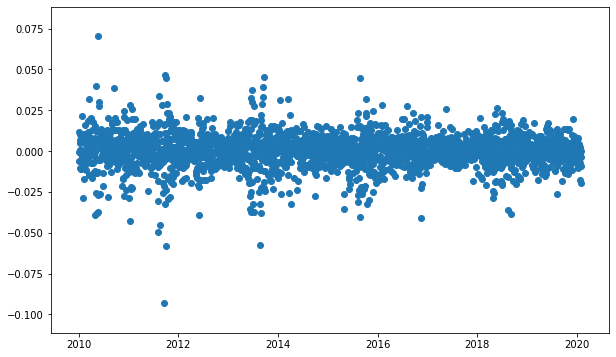

In [5]:
#Ploting the return scatter plot
plt.figure(figsize=(10,6))
plt.scatter(IHSG_log_return.index, IHSG_log_return)
plt.show()

C:\Users\asus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\asus\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


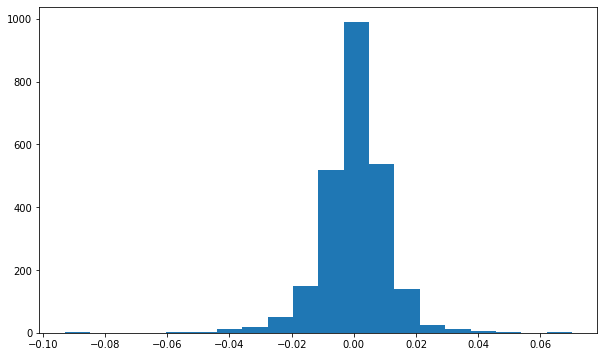

In [6]:
#Ploting the return histogram
plt.figure(figsize=(10,6))
plt.hist(IHSG_log_return, bins=20)
plt.show()

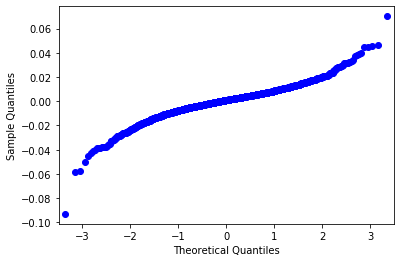

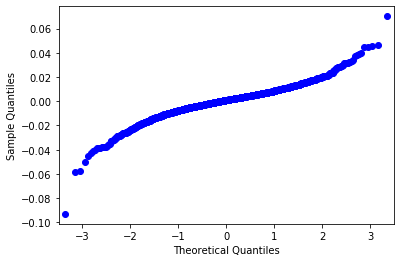

In [7]:
#Plot the log return in qq plot
qqplot(data=np.array(IHSG_log_return[1:]))

## Monte Carlo Simulation of IHSG

In [9]:
np.random.seed(0) # Set seed
u = IHSG_log_return.mean() # mean of log return
var = IHSG_log_return.var() # variance of log return
stdev = IHSG_log_return.std() # stdev of log return
drift = u - (0.5 * var) # calculate drift value

t_intervals = 250 # days of trading
iterations = 100 # how many possibilities are to be calculated
z_value = norm.ppf(np.random.rand(t_intervals, iterations)) # Z value, the random walk element | type: np.ndarray

daily_returns = np.exp(drift + stdev * z_value) # calculate daily return based on random walk | type: np.ndarray

In [10]:
S0 = IHSG.iloc[-1:,0:1] # Create variable S0 equal to the last price of IHSG
price_list = np.zeros_like(daily_returns) # Create price_list variable with the same dimension as daily_returns matrix
price_list[0] = S0 # Set the first row to be equal to S0 | type: np.ndarray

# Create a loop in the range (1, t_intervals) that reassigns 
# to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

price_list

array([[5940.04785156, 5940.04785156, 5940.04785156, ..., 5940.04785156,
        5940.04785156, 5940.04785156],
       [5970.34905867, 5903.98304728, 5980.7313643 , ..., 5901.03199718,
        5845.38359972, 5931.5445252 ],
       [5941.63869048, 5937.33081636, 5963.08937079, ..., 5970.05243548,
        5965.37312186, 6042.91418992],
       ...,
       [7986.84072876, 7376.38664464, 6169.38966589, ..., 7857.30721253,
        5864.5721361 , 6373.42066057],
       [7968.88818002, 7298.03045758, 6284.29370046, ..., 7918.44774933,
        5816.65382004, 6357.52605386],
       [7979.99127476, 7167.5089167 , 6224.14559518, ..., 7956.1746429 ,
        5918.89356534, 6302.2454519 ]])

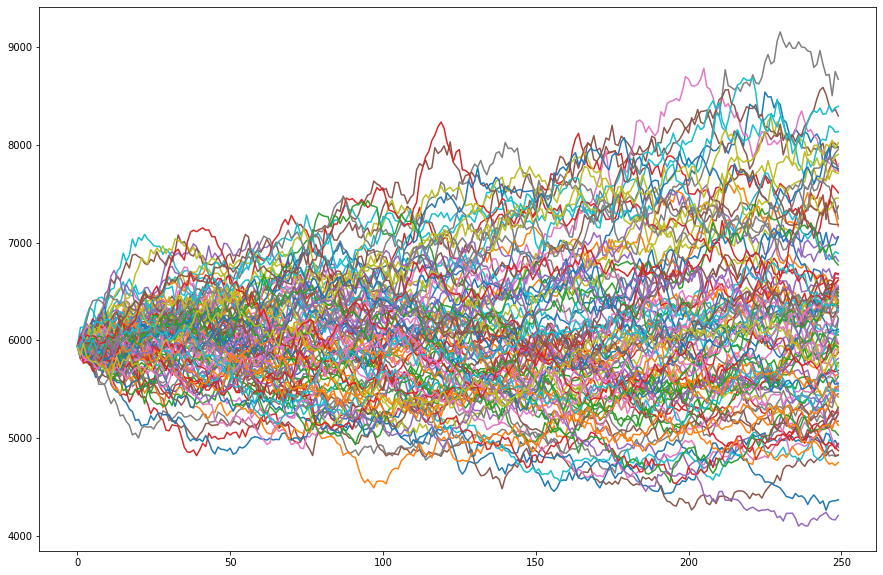

In [11]:
#Plot the simulation
plt.figure(figsize=(15,10))
plt.plot(price_list)
plt.show()